[link](http://www.face-rec.org/algorithms/PCA/jcn.pdf)

# Eigenface

* decompose face iamges into a small set of characteristic feature images called "eigenfaces"
    * or the principal components
* each face is a $N^2$ vector of 256 (or 8-bit) intensity

* steps:
    * $\Gamma_1, \Gamma_2...$ are the training set
    * calculate the mean $\Psi = \frac{1}{M} \sum \Gamma_i$ (you can plot the "average" face)
    * $\Phi_i = \Gamma_i - \Psi$ are the demeaned faces
    * seek to maximize the variance of the projected data $\lambda_k = \frac{1}{M} \sum_i (u_k^T \Phi_i)$
    * also the orthogonality constraint that $u_l^T u_k = \delta_{lk}$, where $\delta_{lk}$ is the kronecker delta
    * it also turns out that $u_k$ and $\lambda_k$ are the eigen vector and value
    of the cov matrix $\frac{1}{M} \sum_i \Phi_i \Phi_i^T = AA^T$
    * $A$ is $[\Gamma_1 \Gamma_2 ... \Gamma_M]$, of shape N^2 by M
    * **Note: each eigen vec is it's own eigenface, see fig 2 **

* difficulties:
    * if $M < N^2$, there will only be $M-1$ meaningful eigen vectors, so let's calculate not $AA^T$ but $A^TA$, a MxM matrix
    * $A^T A v_i = u_i v_i$ by the definition of eigenvector
    * $A A^T A v_i = u_i A v_i$ (note that $u_i$ is a scalar)
        * also note that $Av_i$ is the eigenvector of $C=AA^T$ if you look at it like this $A A^T (A v_i) = u_i (A v_i)$
    * so construct the MxM matrix $L = A^TA$, where $L_{mn} = \Phi_m^T \Phi_n$ (note this can be thought of as a similarity matrix / just dot product)
    * then we'd have M eigenvectors $v_l$ of L
    * the linear combinations of M training images form the eigenface $u_l = \sum_i^M v_{lk} \Phi_k$
        * note this is just a trick to calculate $u_l$


* construction:
    * a new face is transformed to its eigenface via $\omega_k = u_k^T (\Gamma - \Phi)$ for $k \in \{1...M'\}$, where $M'$ is the number of chosen eigen vecs
        * note $\omega_k$ is a scalar
    * then $\Omega^T = [\omega_1 \omega_2 ... \omega_{M'}]$

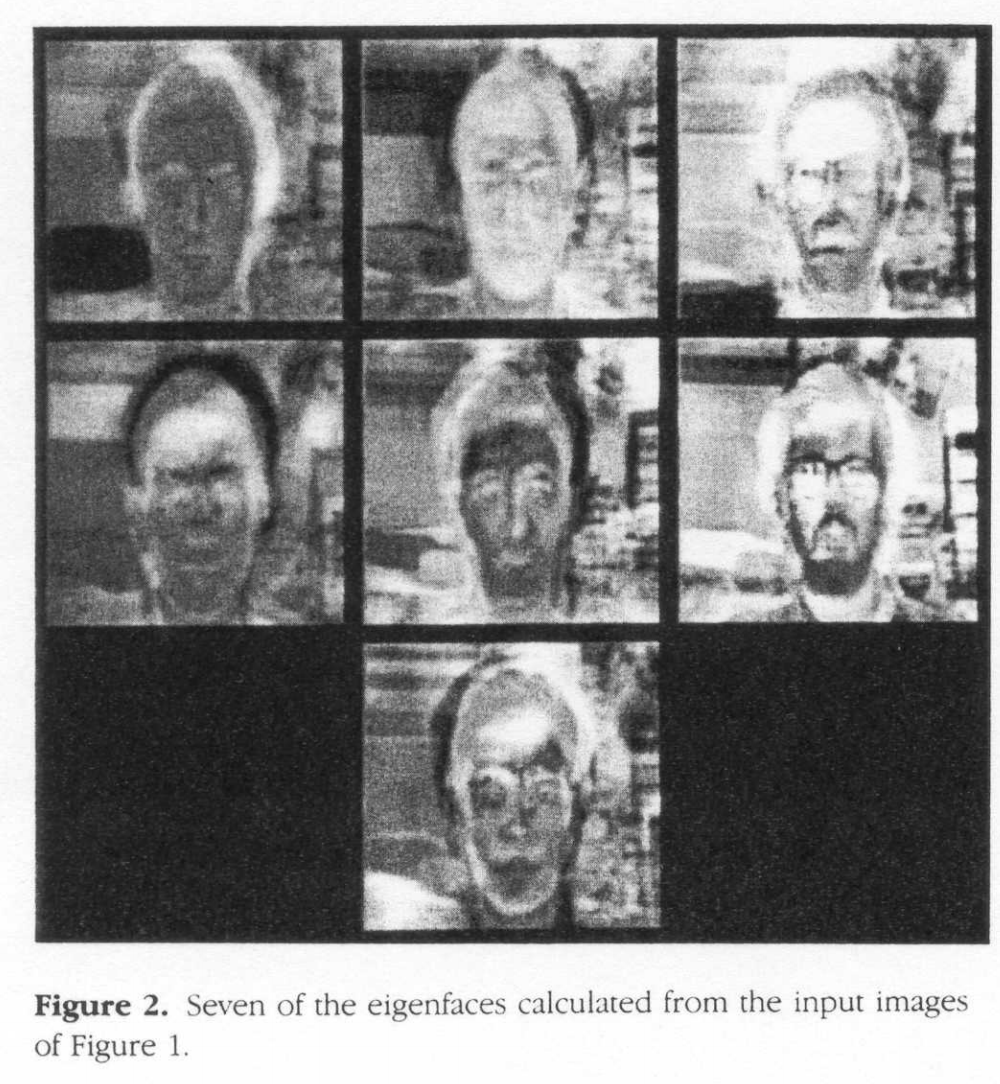

In [1]:
from IPython.display import Image
Image(filename='eigenface.png') 

* find the face that best minimizes $\epsilon_k^2 = \| \Omega - \Omega_k \|^2$, where $\Omega_k$ is a vector describing the kth class

### bounding box detection
* use PCA / reconstruction error to detect which bounding box is the most likely